# Exercice 0 : échauffement

Dans ce TP nous allons représenter des distributions de données via différents types de graphes.

Q1: Expliquez ce que représente et quand utiliser :


*   un scatterplot
*   un barplot
*   un boxplot
*   un violinplot
*   un histogramme






1. Barplot: représente différentes valeurs avec des barres de hauteurs différentes.
2. scatterplot : représente différentes paires (ou triplets) de valeurs sous forme de nuage de points.
3.	Boxplot : représente différentes caractéristiques d’une distribution : médiane, inter-quartile range, 0 et 100 percentiles et outliers (croix rouges).
4.	Violinplot : mix entre boxplot et histogramme : représente les valeurs de la distribution en utilisant un filtrage Gaussien et affiche certaines caractéristiques (e.g. médiane).
5.	Histogramme : représente les différentes valeurs d’un ensemble sous la forme d'un barplot en regrouppant les valeurs par paquets.


# Exercice 1 : description de la base genbank

La base de données genbank est un des principaux dépots de données de génomes, elle gérée par le NCBI Américain (National Center for Biotechnology Information).

Dans cet exercice, allons étudier le contenu général de cette base de données en utilisant les fichiers de résumés.

Q1. Téléchargez les fichier "overview.txt" et "README" disponibles ici :

 https://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/



Q2. Quel est le format du fichier "overview.txt" ?

Chaque ligne représente un organisme, les colonnes donnent différentes info.

Q3. Utilisez le fichier README pour comprendre ce que chaque colonne représente.

Organism/Name  Organism name at the species level according

Kingdom        Taxonomic division: Archaea, Bacteria, Eukaryota, or Viruses

Group                  Commonly used organism groups
* Eukaryota: Animals, Fungi, Plants, Protists;          
* Prokaryota: group corresponds to phylum;
* Viruses: groups defined as the first level (ranked) below the kingdom of Viruses


SubGroup       NCBI Taxonomy level below group:
* Eukaryota: Mammals, Birds, Fishes, Flatworms, Insects, Amphibians Reptiles, Roundworms, Ascomycetes, Basidiomycetes,Land Plants, Green Algae, Apicomplexans, Kinetoplasts;
* Prokaryota: sub-groups correspond to class level;
* Viruses: sub-groups correspond to families including floating genera

Size (Mb)      Estimated genome size

Chrs           Number of chromosomes

Organelles     Number of the organelles

Plasmids       Number of plasmids

BioProjects    Number of genome sequencing projects

## Organisation de la base de données

In [201]:
from matplotlib import pyplot as plt
import numpy as np

#chargement
import requests as reqs
dats = reqs.get("https://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/overview.txt")
dats = dats.text.split("\n")[1:-1]
dats = [e.split("\t") for e in dats]

Q4. Combien d’organismes sont présents ?

In [193]:
print(len(dats))

87888


### Royaumes

Q5. Qu'est-ce qu'un royaume ?

```markdown
Votre réponse ici
```

Q6. Combien de royaumes sont présents dans la base ?

In [194]:
kngdms = set([e[1] for e in dats])
print(len(kngdms))

4


Q7. Affichez le nombre d’organismes pour chaque royaume.

Archaea 2263
Eukaryota 15560
Bacteria 37492
Viruses 32573


Text(0, 0.5, 'Number of organisms')

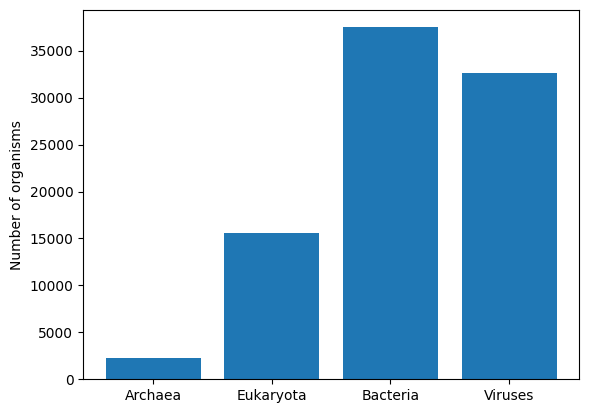

In [195]:
cnt = []
for k in kngdms:
  tmp = sum([1 for e in dats if e[1] == k])
  cnt.append(tmp)
  print(k, tmp)

plt.figure()
plt.bar(list(kngdms), cnt)
plt.ylabel("Number of organisms")

### Groupes

Q8. Qu’est-ce qu’un groupe ?

```markdown
Votre réponse ici
```

Q9. Combien de groupes sont présents par royaume ?

In [196]:
kngdm_grp = {}
for k in kngdms:
  elts = set([e[2] for e in dats if e[1] == k])
  kngdm_grp[k] = elts
  print(k, len(elts), elts)

Archaea 11 {'Euryarchaeota', 'Asgard group', 'DPANN group', 'Candidatus Hadarchaeota', 'Candidatus Hydrothermarchaeota', 'Candidatus Thermoplasmatota', 'Halobacteriota', 'environmental samples', 'Other', 'unclassified Archaea', 'TACK group'}
Eukaryota 5 {'Protists', 'Plants', 'Fungi', 'Animals', 'Other'}
Bacteria 37 {'Campylobacterota', 'Thermotogota', 'Coprothermobacterota', 'Caldisericota/Cryosericota group', 'Nitrospinota/Tectimicrobiota group', 'Terrabacteria group', 'Dictyoglomota', 'Candidatus Krumholzibacteriota', 'Other', 'Calditrichota', 'FCB group', 'Candidatus Lernaellota', 'Elusimicrobiota', 'Spirochaetota', 'Chrysiogenota', 'delta/epsilon subdivisions', 'Nitrospirota', 'Candidatus Hinthialibacterota', 'Aquificota', 'Bdellovibrionota', 'Myxococcota', 'Thermodesulfobacteriota', 'Bacteria incertae sedis', 'Thermosulfidibacterota', 'Thermodesulfobiota', 'unclassified Bacteria', 'Candidatus Deferrimicrobiota', 'Atribacterota', 'Fusobacteriota', 'Acidobacteriota', 'Deferribacter

Q10. Affichez pour chaque royaume le nombre d’organismes par groupe.

Archaea
  Euryarchaeota 1035
  Asgard group 61
  DPANN group 249
  Candidatus Hadarchaeota 8
  Candidatus Hydrothermarchaeota 6
  Candidatus Thermoplasmatota 432
  Halobacteriota 1
  environmental samples 5
  Other 1
  unclassified Archaea 57
  TACK group 408
Eukaryota
  Protists 664
  Plants 1758
  Fungi 5213
  Animals 7789
  Other 136
Bacteria
  Campylobacterota 256
  Thermotogota 72
  Coprothermobacterota 5
  Caldisericota/Cryosericota group 21
  Nitrospinota/Tectimicrobiota group 39
  Terrabacteria group 13337
  Dictyoglomota 5
  Candidatus Krumholzibacteriota 4
  Other 2
  Calditrichota 10
  FCB group 5037
  Candidatus Lernaellota 2
  Elusimicrobiota 118
  Spirochaetota 344
  Chrysiogenota 6
  delta/epsilon subdivisions 288
  Nitrospirota 156
  Candidatus Hinthialibacterota 2
  Aquificota 42
  Bdellovibrionota 122
  Myxococcota 146
  Thermodesulfobacteriota 568
  Bacteria incertae sedis 3872
  Thermosulfidibacterota 1
  Thermodesulfobiota 2
  unclassified Bacteria 346
  Candidatus

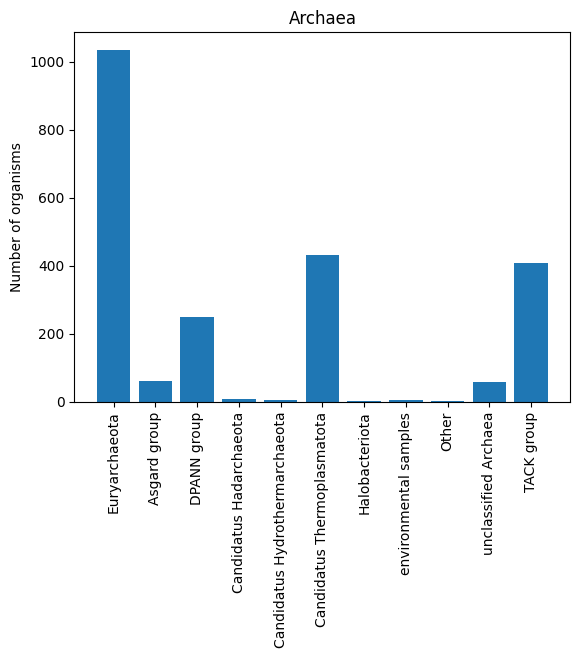

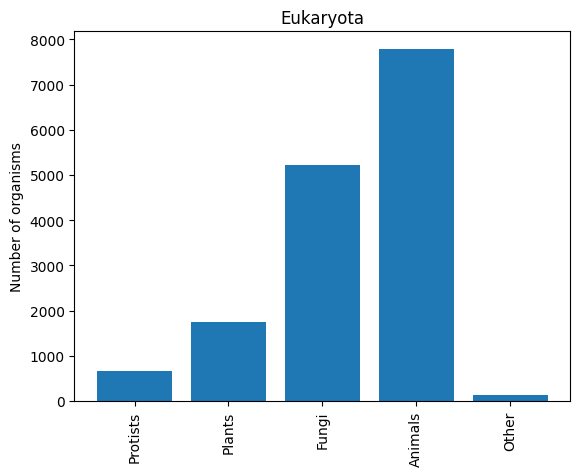

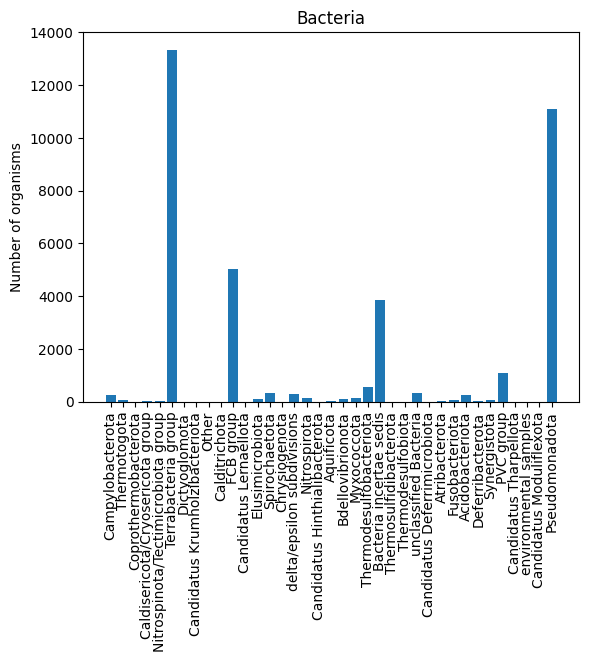

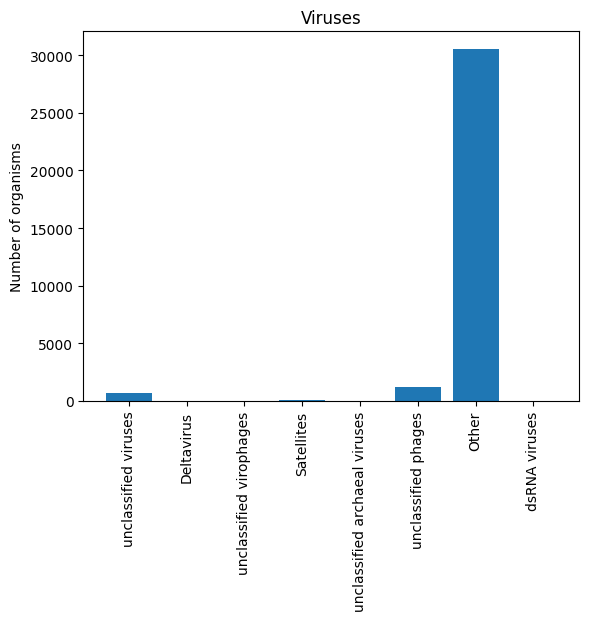

In [206]:
for k,grps in kngdm_grp.items():
  print(k)
  cnts = []
  for g in grps:
    tmp = sum([1 for e in dats if e[1] == k and e[2] == g])
    cnts.append(tmp)
    print(" ", g, tmp)

  plt.figure()
  plt.title(k)
  plt.bar(list(grps), cnts)
  plt.xticks(rotation=90)
  plt.ylabel("Number of organisms")

## Génomes

Q11. Affichez la distribution des tailles de génomes sur toute la base de données, utilisez un boxplot ou un violinplot (avec axe en log pour y voir quelque chose).

113.38576225854791 Mb


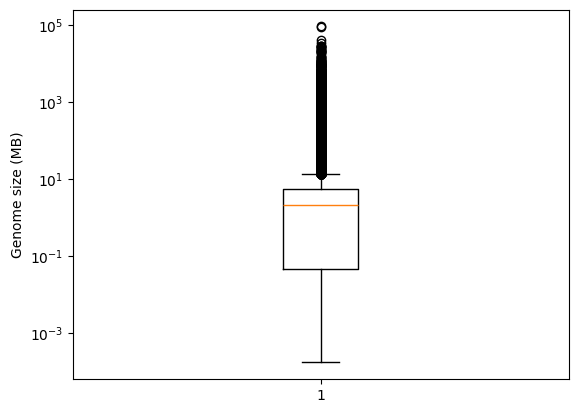

In [209]:
vals = [float(e[4]) for e in dats if e[4] != "-"]

plt.figure()
plt.boxplot([float(e[4]) for e in dats if e[4] != "-"])
plt.yscale('log')
plt.ylabel("Genome size (MB)")

print(np.mean(vals), "Mb")

Q12. Affichez la distribution par royaume.

Archaea 2.1329705046398586 Mb
Eukaryota 631.2816077456134 Mb
Bacteria 3.6136873079857037 Mb
Viruses 0.08327989132103276 Mb


<ipython-input-210-7aed8e6dff1c>:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(cnts, labels=kngdms)


Text(0, 0.5, 'Genome size (MB)')

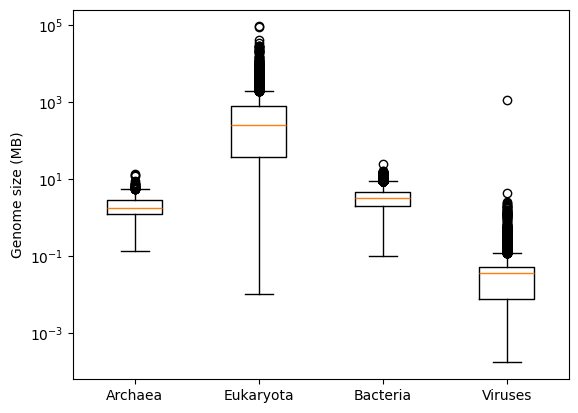

In [210]:
cnts = []
for k in kngdms:
  vals = [float(e[4]) for e in dats if e[1] == k and e[4] != "-"]
  cnts.append(vals)
  print(k, np.mean(vals), "Mb")

plt.figure()
plt.boxplot(cnts, labels=kngdms)
plt.yscale('log')
plt.ylabel("Genome size (MB)")

Q13. Affichez la distribution par groupe pour chaque royaume.

<ipython-input-213-69f6dae7cb49>:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(cnts, labels=grps-{"Other"})
<ipython-input-213-69f6dae7cb49>:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(cnts, labels=grps-{"Other"})
<ipython-input-213-69f6dae7cb49>:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(cnts, labels=grps-{"Other"})
<ipython-input-213-69f6dae7cb49>:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(cnts, labels=grps-{"Other"})


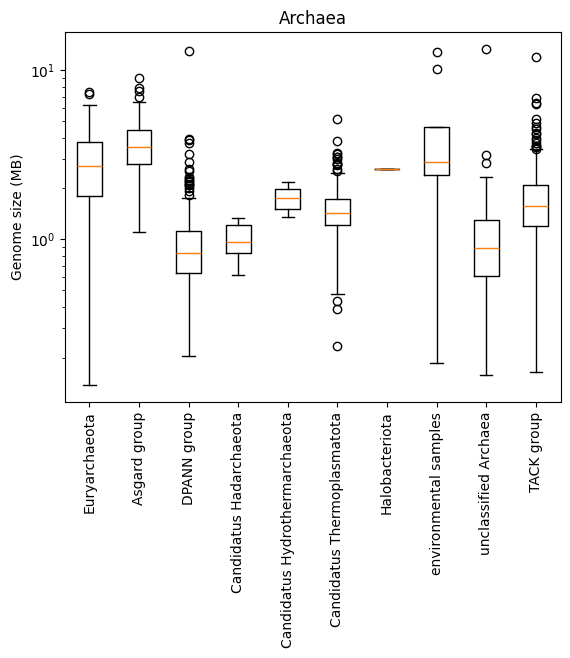

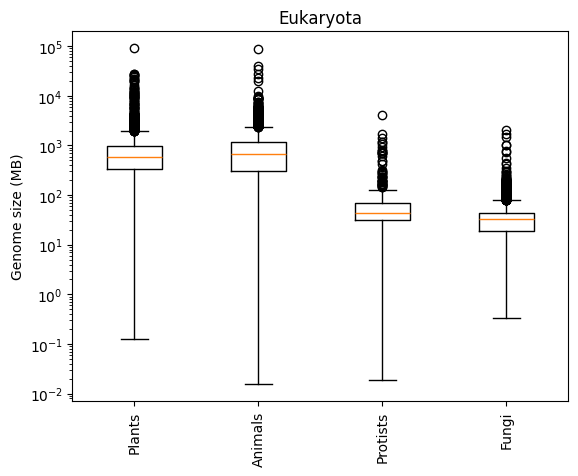

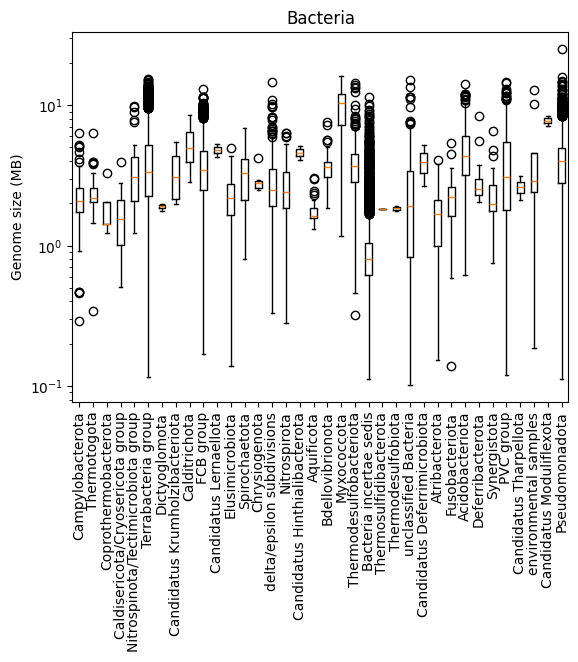

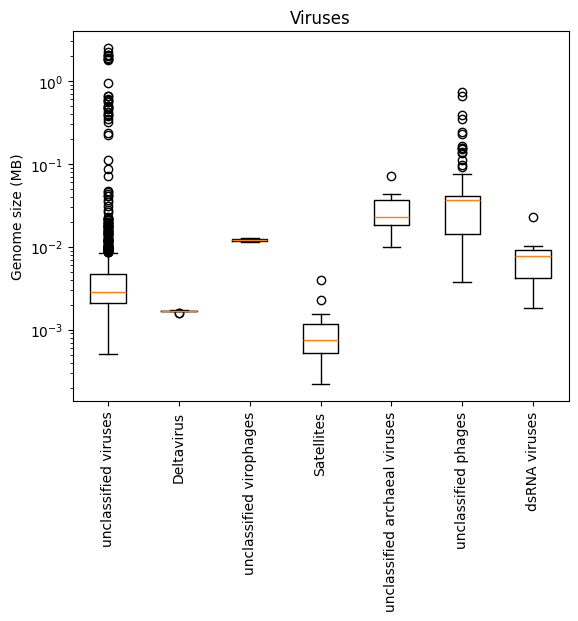

In [213]:
for k,grps in kngdm_grp.items():
  cnts = []
  for g in grps - {"Other"}:
    cnts.append([float(e[4]) for e in dats if e[2] == g and e[4] != "-"])

  plt.figure()
  plt.title(k)
  plt.boxplot(cnts, labels=grps-{"Other"})
  plt.xticks(rotation=90)
  plt.yscale('log')
  plt.ylabel("Genome size (MB)")

Q14. Pour chaque royaume, donnez le nom et la taille de l’organisme avec le plus petit génome.

In [216]:
for k in kngdms:
  names = [e[0] for e in dats if e[1] == k]
  vals = [float(e[4]) if e[4] != "-" else 999999 for e in dats if e[1] == k]
  imin = min(range(len(vals)), key=vals.__getitem__)
  print(k, names[imin], vals[imin], "Mb")

Archaea candidate division MSBL1 archaeon SCGC-AAA385M02 0.137797 Mb
Eukaryota Fragilariopsis kerguelensis 0.010223 Mb
Bacteria bacterium AG-323-L21 0.101587 Mb
Viruses Hippotragine gammaherpesvirus 1 0.000174 Mb


Q15. Même chose mais pour l'organisme avec le plus grand génome.

In [217]:
for k in kngdms:
  names = [e[0] for e in dats if e[1] == k]
  vals = [float(e[4]) if e[4] != "-" else -1 for e in dats if e[1] == k]
  imax = max(range(len(vals)), key=vals.__getitem__)
  print(k, names[imax], vals[imax], "Mb")

Archaea archaeon 13.3999 Mb
Eukaryota Viscum album 91113.7 Mb
Bacteria Thiomonas 25.1426 Mb
Viruses uncultured virus 1150.68 Mb


## Chromosomes

Q16. Affichez la distribution du nombre de chromosomes, sous la forme d’un histogramme, sur toute la base de données.

(array([0.0000e+00, 3.8596e+04, 1.0840e+03, 6.8200e+02, 1.8000e+02,
        1.5200e+02, 2.1700e+02, 1.9600e+02, 1.6800e+02, 1.2200e+02,
        1.9800e+02, 2.2100e+02, 1.7400e+02, 1.2400e+02, 1.3400e+02,
        9.0000e+01, 9.1000e+01, 6.8000e+01, 1.1400e+02, 1.1300e+02,
        7.3000e+01, 5.7000e+01, 8.2000e+01, 8.1000e+01, 2.0000e+02,
        9.3000e+01, 4.3000e+01, 2.5000e+01, 6.3000e+01, 5.8000e+01,
        1.0900e+02, 2.0400e+02, 9.6000e+01, 2.9000e+01, 2.2000e+01,
        2.5000e+01, 3.2000e+01, 1.6000e+01, 1.6000e+01, 1.0000e+01,
        2.3000e+01, 2.9000e+01, 7.0000e+00, 7.0000e+00, 8.0000e+00,
        4.0000e+00, 1.1000e+01, 1.0000e+00, 6.0000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49.]),
 <BarContainer object of 49 artists>)

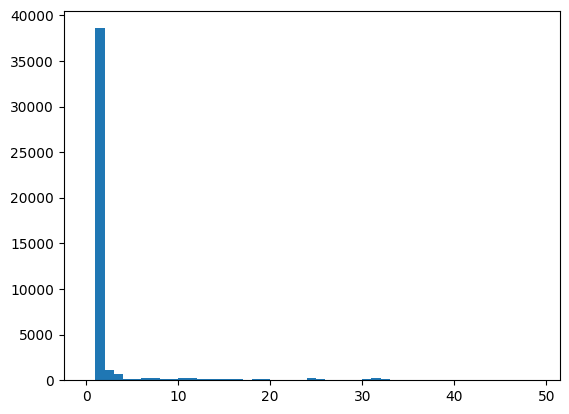

In [218]:
vals = [int(e[5]) for e in dats if e[5] != "-"]

plt.figure()
plt.hist(vals, bins=range(50))

Q17. Même chose mais pour chaque royaume sous la forme d'un boxplot (ou violinplot).

<ipython-input-219-2c614eee9f4c>:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(vals, labels=kngdms)


{'whiskers': [<matplotlib.lines.Line2D at 0x7c8f098d0410>,
 'caps': [<matplotlib.lines.Line2D at 0x7c8f098d1750>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c8f098d1dd0>,
 'medians': [<matplotlib.lines.Line2D at 0x7c8f1189dc50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7c8f18a69a90>,
 'means': []}

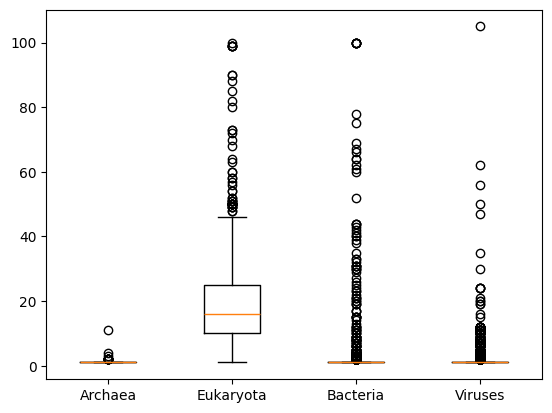

In [219]:
vals = []
for k in kngdms:
  vals.append([int(e[5]) for e in dats if e[1] == k and e[5] != "-"])

plt.figure()
plt.boxplot(vals, labels=kngdms)

Q18. Qu’observez-vous ? Comment l’expliquez-vous ?

```markdown
Votre réponse ici
```

Q19. Pour les Eucaryotes uniquement, affichez la distribution du nombre de chromosomes sous la forme d’un histogramme.

(array([  0.,  17.,  14.,  57.,  71., 106., 185., 178., 138., 108., 129.,
        191., 157., 123., 133.,  84.,  90.,  65., 114., 108.,  69.,  53.,
         81.,  79., 195.,  92.,  42.,  24.,  63.,  57., 105., 200.,  95.,
         27.,  22.,  23.,  32.,  16.,  15.,   9.,  21.,  28.,   6.,   6.,
          5.,   4.,  11.,   0.,   2.,   4.,  12.,   4.,   2.,   0.,   2.,
          0.,   1.,   1.,   2.,   0.,   2.,   0.,   0.,   1.,   1.,   0.,
          0.,   0.,   1.,   0.,   1.,   0.,   1.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,
          1.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   5.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
        52., 53., 54., 55., 56., 57., 58

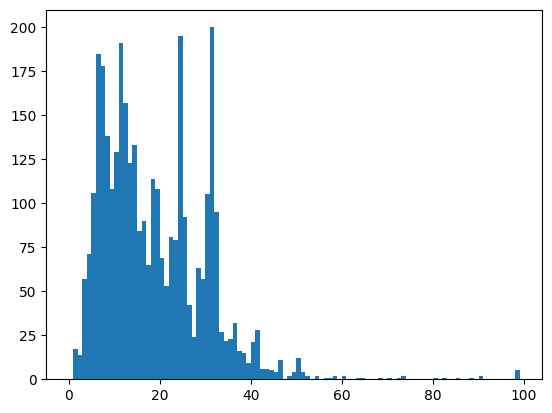

In [220]:
vals = [int(e[5]) for e in dats if e[1] == "Eukaryota" and e[5] != "-"]

plt.figure()
plt.hist(vals, bins=range(100))

Q20. Pour les Eucaryotes uniquement, affichez la taille des génomes en fonction du nombre de chromosomes, sous forme d'un graphe (scatter plot).

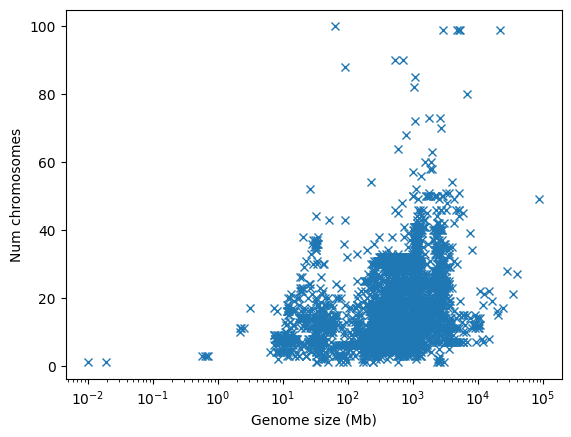

In [221]:
xvals = [float(e[4]) for e in dats if e[1] == "Eukaryota" and e[4] != "-" and e[5] != "-"]
yvals = [int(e[5]) for e in dats if e[1] == "Eukaryota" and e[4] != "-" and e[5] != "-"]


plt.figure()
plt.plot(xvals, yvals, "x")
plt.xlabel("Genome size (Mb)")
plt.ylabel("Num chromosomes")
plt.xscale("log")

Q21. Qu’observez-vous ?

```markdown
Votre réponse ici
```

## Plasmides

Q22. Qu'est-ce qu'un plasmide ?

```markdown
Votre réponse ici
```

Q23. Affichez le nombre moyen de plasmides par royaume, sous forme d'un barplot.

Text(0, 0.5, 'Nombre plasmides')

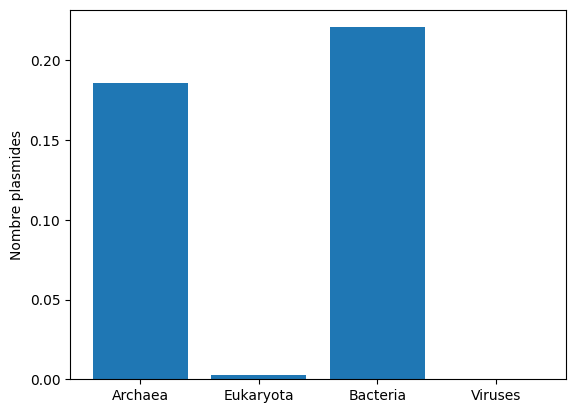

In [222]:
cnts = []
for k in kngdms:
  cnts.append(np.mean([int(e[7]) if e[7] != "-" else 0 for e in dats if e[1] == k]))


plt.figure()
plt.bar(list(kngdms), cnts)
plt.ylabel("Nombre plasmides")

Q24. Qu'observez-vous ?

```markdown
Votre réponse ici
```

## Projets

Q25. Qu'est-ce qu'un projet ?

```markdown
Votre réponse ici
```

Q26. Affichez le nombre de projets moyen par organisme pour chaque royaume, sous forme d'un barplot.

In [ ]:
cnts = []
for k in kngdms:
  cnts.append(np.mean([float(e[8]) for e in dats if e[1] == k and e[8] != "-\r"]))

plt.figure()
plt.bar(list(kngdms), cnts)
plt.ylabel("AVG Num projects")

Q27. Combien d'organismes ont 0 projets ?

In [ ]:
print(sum([1 for e in dats if e[8] == "-\r"]))

Q28. Combien d'organismes ont > 1 projets ?

In [ ]:
print(sum([1 for e in dats if e[8] != "-\r" and int(e[8]) > 1]))

Q29. Affichez le nom et nombre du TOP 5 des organismes possédant le plus de projets.

In [ ]:
vals = [int(e[8]) if e[8] != "-\r" else -1 for e in dats]
idxs = sorted(range(len(vals)), key=lambda i: vals[i], reverse=True)
for i in idxs[:5]:
  print(dats[i][0], dats[i][8])

Q30. Expliquez rapidement pourquoi ces organismes sont les plus étudiés.

```markdown
Votre réponse ici
```

# Exercice 3 : Gènes

Pour obtenir des informations plus précises sur les gènes contenus dans les différents organismes de genbank, nous allons travailler avec le fichier de résumé d'assemblage.

Q1. Récupérez le fichier "assembly_summary_genbank_historical.txt" situé ici:
https://ftp.ncbi.nlm.nih.gov/genomes/ASSEMBLY_REPORTS/

(On utilise le fichier historique car il est plus petit, l’autre fichier fait >1GB)

Q2. Qu'est-ce que le GC content ? Pourquoi est-il mesuré?

```markdown
Votre réponse ici
```

Q3. Affichez la distribution du GC content dans tous les organismes de la liste, sous forme d'un violinplot.

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

#chargement
import requests as reqs
dats = reqs.get("https://ftp.ncbi.nlm.nih.gov/genomes/ASSEMBLY_REPORTS/assembly_summary_genbank_historical.txt")
dats = dats.text.split("\n")
head = dats[1].split("\t")
dats = dats[2:-1]
dats = [e.split("\t") for e in dats]

In [ ]:
vals = [float(e[27]) for e in dats if float(e[27]) > 0 and float(e[27]) < 100]
plt.violinplot(vals)
plt.ylabel("GC-content (%)")

print(np.mean(vals))

Q4. Qu'observez-vous ?

```markdown
Votre réponse ici
```

Q5. Affichez le GC content en fonction de la taille du génome, sous forme de scatter plot.

In [ ]:
valsx = [float(e[26]) for e in dats if float(e[27]) > 0 and float(e[27]) < 100]
valsy = [float(e[27]) for e in dats if float(e[27]) > 0 and float(e[27]) < 100]

plt.plot(valsx, valsy, "x")
plt.xlabel("Genome size (Mb)")
plt.ylabel("GC-content (%)")
plt.xscale('log')


Q6. Qu'observez-vous ?

```markdown
Votre réponse ici
```

Q7. Affichez la distribution du nombre de gènes, choisissez le plot.

In [ ]:
vals = [int(e[34]) for e in dats if e[34] != "na"]

plt.boxplot(vals)
plt.xlabel("Number of genes")
plt.yscale('log')


Q8. Qu'observez-vous ?

```markdown
Votre réponse ici
```

Q9. Enlevez les données aberrantes (outliers)

In [ ]:
vals = [int(e[34]) for e in dats if e[34] != "na" and int(e[34]) < 10000]

plt.hist(vals, bins=100)
plt.xlabel("Number of genes")

Q10. Comment avez-vous fait ? Quel seuil avez-vous choisi ?

```markdown
Votre réponse ici
```

Q11. Y-a-t-il une corrélation entre taille du génome et nombre de gènes ?

In [ ]:
valsx = [int(e[34]) for e in dats if e[34] != "na" and 0 < int(e[34]) < 10000]
valsy = [int(e[26]) for e in dats if e[34] != "na" and 0 < int(e[34]) < 10000]


plt.plot(valsx, valsy, "x")
plt.yscale("log")
plt.xlabel("Number of genes")
plt.ylabel("Genome size (Mb)")

# Exercice 4: GC-content

Pour une séquence $s$, le contenu en GC est défini par :

$GC(s)=\frac{\#G(s) + \#C(s)}{|s|}$,

où $\#N(s)$ est le nombre de nucléotides $N$ dans la séquence $s$ et $|s|$ est la taille de $s$.

Q1. Récuperrez legénome de l’organisme *Acidianus ambivalens* à partir du FTP :

https://ftp.ncbi.nlm.nih.gov/genomes/genbank/archaea/


In [ ]:
from matplotlib import pyplot as plt
import numpy as np

#chargement
import requests as reqs
import zlib

dats = reqs.get("https://ftp.ncbi.nlm.nih.gov/genomes/genbank/archaea/Acidianus_ambivalens/latest_assembly_versions/GCA_009729015.1_ASM972901v1/GCA_009729015.1_ASM972901v1_genomic.fna.gz")
dats = zlib.decompress(dats.content, zlib.MAX_WBITS|32).decode()
dats = dats.split("\n")[1:]
dats = "".join(dats)


Q2. Affichez le GC content global.

In [ ]:
print((dats.count("C") + dats.count("G")) / len(dats))

Q3. Pour détecter des variations locales de GC, on va utiliser une fenêtre glissante de taille N nucléotides (démarrer à la position N/2 et finir à |s| -N/2).

Affichez le GC content le long du génome pour des fenêtres de tailles 50, 1000 ou 10000.

In [ ]:
from scipy.signal import savgol_filter

win_size = 10000
gc = []
for k in range(win_size, len(dats) - win_size):
    cur = dats[(k-win_size):(k+win_size)]
    gc.append((cur.count("G") + cur.count("C")) / len(cur))

plt.figure()
plt.plot(range(len(gc)), gc)
plt.plot(range(len(gc)), savgol_filter(gc, 51, 5), "r")

Q4. Qu’observez-vous ?

Ce n'est pas constant, il y a des régions plus hautes et d'autres plus basses.

Q5. On va lisser le signal pour le rendre moins bruité en utilisant la fonction *savgol_filter* de *scipy.signal* avec les paramètres $51$ et $5$.

In [ ]:
#Votre code ici

Q6. Finalement, on va rendre le code générique pour n'importe quel espèce. Modifier votre code pour qu'il prenne en entrée un nom de fichier de génome du ftp, et une taille de fenêtre, et affiche le GC content global et local.

In [ ]:
#Votre code ici